# **K-NN**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

Load data set

In [37]:
df = pd.read_csv("Infrared.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


In [38]:
df.isnull().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


In [39]:
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

In [45]:
# Pisahkan fitur dan target
X = df.drop(columns=["aveOralM"])
y = df["aveOralM"]

# Identifikasi kolom kategorikal dan numerikal
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["float64"]).columns.tolist()

# Preprocessing pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Preprocessing pipeline untuk fitur kategorikal
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Gabungkan preprocessing untuk semua kolom
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Buat pipeline model K-NN
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor())  # default n_neighbors=5
])

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Latih model
knn_pipeline.fit(X_train, y_train)

# Prediksi pada data test
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

In [46]:
# Tampilkan hasil evaluasi
print("K-NN Evaluation Metrics:")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")

K-NN Evaluation Metrics:
MSE   : 0.0706
RMSE  : 0.2658
R²    : 0.6778


# **Decision Tree**

In [47]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Target and features
X = df.drop(columns=["aveOralM"])
y = df["aveOralM"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["float64"]).columns.tolist()

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Create the pipeline
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grid search parameters
param_grid = {
    "regressor__max_depth": [3, 5, 10, 15, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and evaluation
best_tree_model = grid_search.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best_tree)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best_tree)

In [49]:
grid_search.best_params_, {"MSE": mse_best, "RMSE": rmse_best, "R²": r2_best}

({'regressor__max_depth': 3,
  'regressor__min_samples_leaf': 4,
  'regressor__min_samples_split': 10},
 {'MSE': 0.07752344081752117,
  'RMSE': np.float64(0.2784303159096027),
  'R²': 0.646406485578605})

# **MATH EXPLANATION**

#**PENJELASAN**

1. RMSE (Root Mean Squared Error)

*   RMSE adalah akar dari rata-rata kuadrat kesalahan. ini adadalah metrik yang digunakan untuk mengukur seberapa jauh prediksi model dibandingkan dengan nilai sebenarnya. berikut merupakan rumus RMSE.

  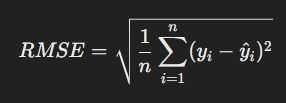

*   diket:
  - n = jumlah data
  - yi = nilai sebenarnya
  - vektor yi = nilai prediksi

*   interpretasi: RMSE memberikan nilai satuan yang sama dengan data asli dan Semakin kecil nilai RMSE, semakin baik juga modelnya karena kesalahan prediksi lebih kecil.

2.   MSE (Mean Squared Error)
*   MSE adalah rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai sebenarnya.

  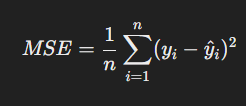

3. R^2

*   R^2 adalah ukuran seberapa baik model regresi dapat menjelaskan variabilitas dalam data.
 - 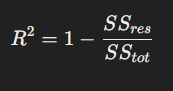
  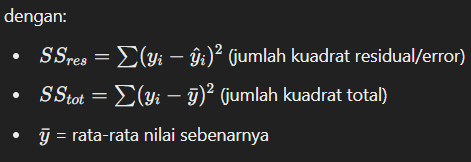
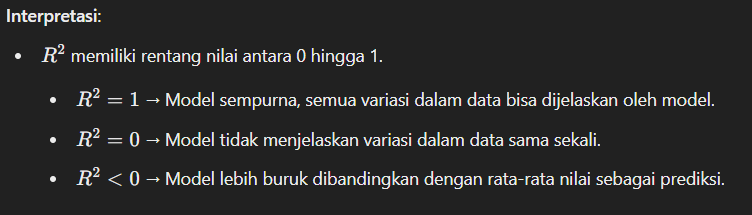